In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/saurabh-shete/dsbdal_practicals/main/PS07/HousingData.csv')

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
df.shape

(506, 14)

In [8]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)

In [13]:
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

In [14]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


<Axes: >

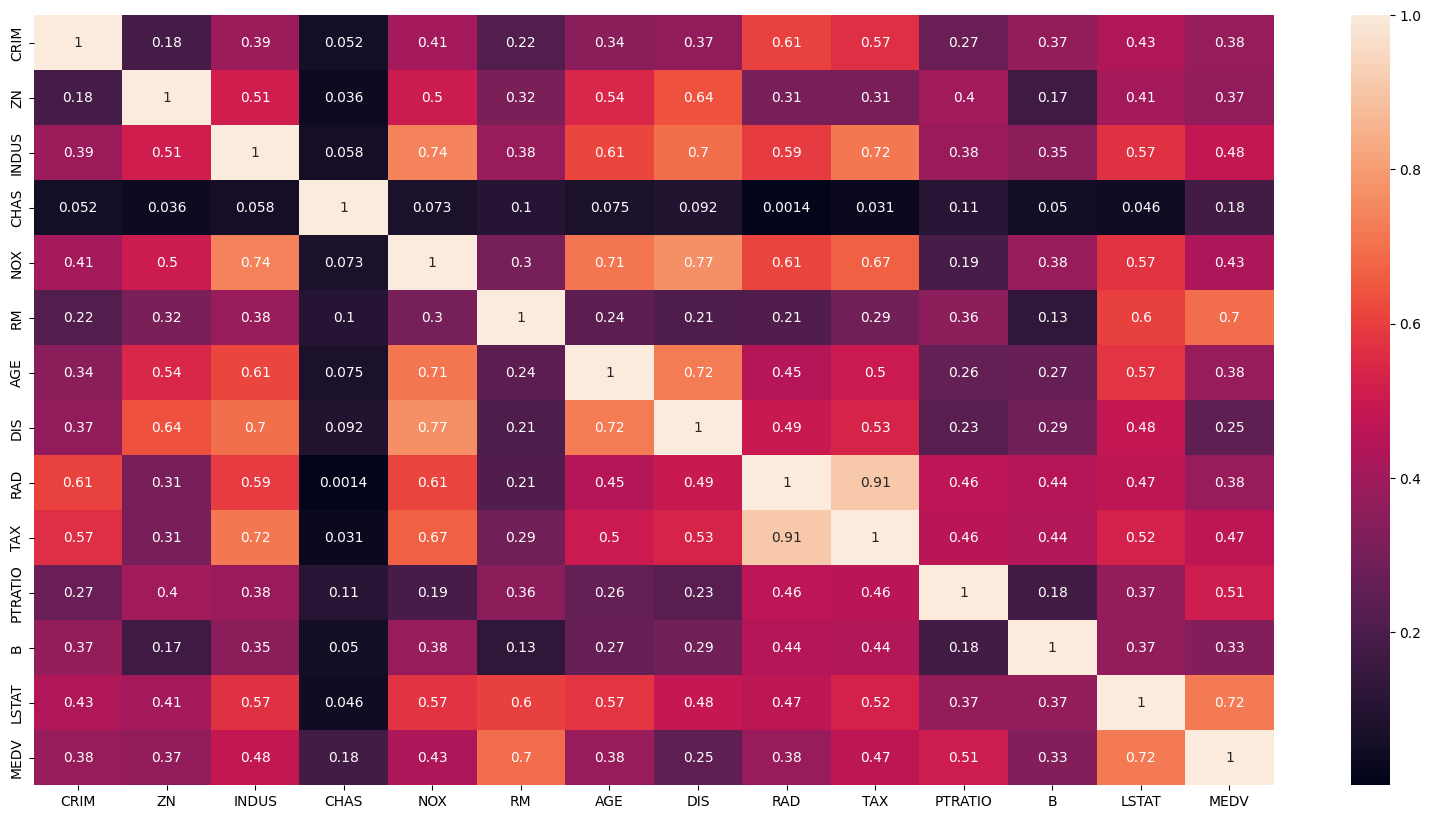

In [22]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr().abs(), annot=True)

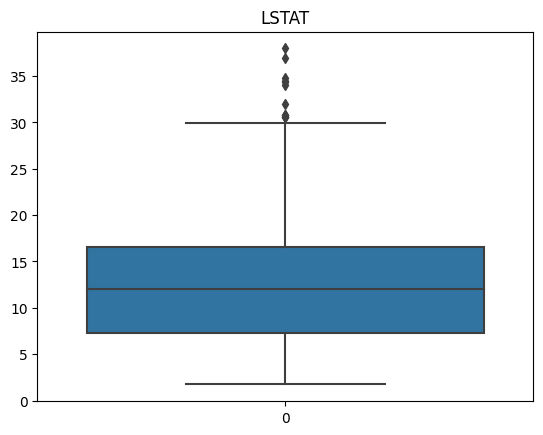

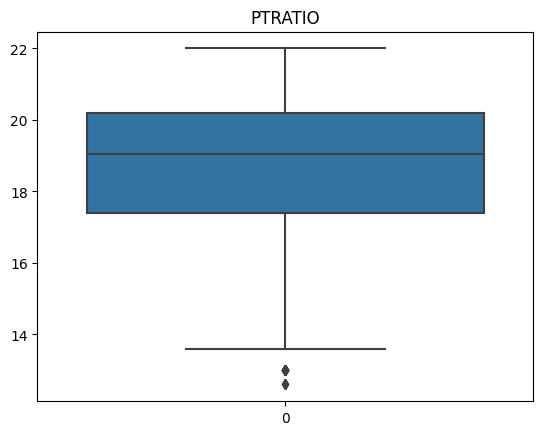

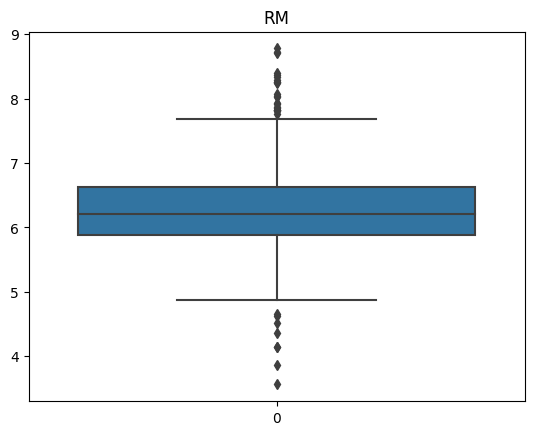

<Figure size 640x480 with 0 Axes>

In [28]:
independent_features = ['LSTAT', 'PTRATIO', 'RM']
for fea in independent_features:
    sns.boxplot(df[fea])
    plt.title(fea)
    plt.figure()

In [29]:
df.skew()

CRIM       5.318370
ZN         2.302295
INDUS      0.309871
CHAS       3.450763
NOX        0.729308
RM         0.403612
AGE       -0.594261
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.927291
MEDV       1.108098
dtype: float64

In [31]:
df[['LSTAT', 'PTRATIO', 'RM']] = StandardScaler().fit_transform(df[['LSTAT', 'PTRATIO', 'RM']])

In [32]:
x = df[['LSTAT', 'PTRATIO', 'RM']]
y = df['MEDV']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [40]:
model = LinearRegression().fit(x_train, y_train)

In [42]:
result = model.predict(x_test)

In [45]:
model.score(x_train, y_train)

0.6538684203911784

In [46]:
model.score(x_test, y_test)

0.7000978834963384

In [50]:
print(f"RMSE {np.sqrt(metrics.mean_squared_error(y_test, result))}")
print(f"MSE {metrics.mean_squared_error(y_test, result)}")
print(f"MAE {metrics.mean_absolute_error(y_test, result)}")


RMSE 5.512548975426883
MSE 30.38819620647998
MAE 3.9446830063409766
